# Data collection

Download MDI or HMI magnetogram from JSOC and select specific patches

In this section it is shown how to download magnetogram from Jsoc database and select ARs patches with specific location 

In [1]:
import numpy as np 
import os
import pickle, urllib
import pandas as pd 
import matplotlib.patches as patches
%matplotlib inline
%load_ext autoreload
%autoreload 2
from utilsFitsCrop import request_mfits_by_date, region_coord_list, read_fits_to_map, draw_regions, return_pixel_from_map

In [2]:
EMAIL = 'yourmail'

## Download table with Solar Active Region information

In [3]:
sunspots = pickle.load(urllib.request.urlopen('https://raw.githubusercontent.com/iknyazeva/FitsProcessing/master/sunspot_1996_2017.pkl'))
sunspots.tail(5)

,,number_of_ss,size,class,location,magn_class
date,region,,,,,
2017-12-24,12692,12,90,DAO,N18E03,B
2017-12-25,12692,12,160,EAI,N18W09,B
2017-12-26,12692,7,100,EAO,N18W23,B
2017-12-27,12692,4,30,CRO,N18W35,B
2017-12-28,12692,1,10,AXX,N17W46,A


## Choose magnetogram type and interesting data moment

If you need data before 2010 year, take MDI data,after - HMI

### MDI example

In [4]:
SAVE_PATH = 'MDIdataset'


def check_dataset_directory():
    if not os.path.exists('MDIdataset'):
        os.makedirs('MDIdataset')
    
    return 'MDIdataset'
check_dataset_directory()

'MDIdataset'

In [5]:
rc_list = region_coord_list('2003-04-10', sunspots_df=sunspots)
print(f'At this data moment there are {len(rc_list)} ARs, see location info below:...')
print(pd.DataFrame(rc_list, columns=['Data', 'NOAA AR','Location']))

At this data moment there are 3 ARs, see location info below:...
        Data  NOAA AR Location
0 2003-04-10    10330   N08W02
1 2003-04-10    10332   N11E31
2 2003-04-10    10333   N11W36


In [6]:
filepath  = request_mfits_by_date(rc_list[0][0], email = EMAIL, mtype = 'MDI', path_to_safe = 'MDIdataset')

Magnetogram already exists


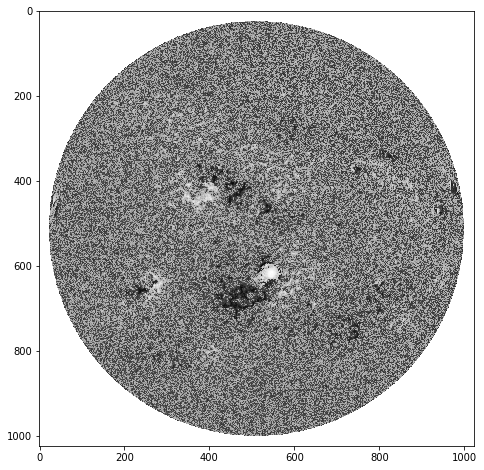

In [7]:
mymap = read_fits_to_map(filepath, plot_show=True)

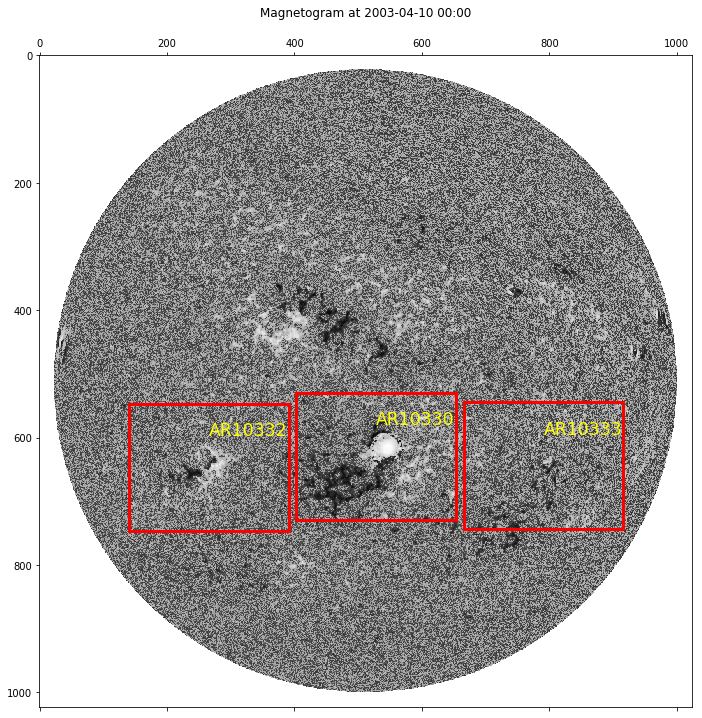

In [8]:
draw_regions(mymap, rc_list, delta=100)

Return coordinates of central pixels for choosen region(used for extract fragment)   

In [9]:
record = rc_list[0]
pxs = return_pixel_from_map(mymap, record[2])
print(pxs)

[528.04387359 629.57205998]


## HMI example 

In [10]:
SAVE_PATH = 'HMIdataset'


def check_dataset_directory():
    if not os.path.exists('HMIdataset'):
        os.makedirs('HMIdataset')
    
    return 'HMIdataset'
check_dataset_directory()

'HMIdataset'

In [11]:
rc_list = region_coord_list('2011-04-03', sunspots_df=sunspots)
print(f'At this data moment there are {len(rc_list)} ARs, see location info below:...')
print(pd.DataFrame(rc_list, columns=['Data', 'NOAA AR','Location']))

At this data moment there are 3 ARs, see location info below:...
        Data  NOAA AR Location
0 2011-04-03    11180   N24W38
1 2011-04-03    11183   N15W12
2 2011-04-03    11184   N15E15


In [12]:
filepath  = request_mfits_by_date(rc_list[0][0], email = EMAIL, mtype = 'HMI', path_to_safe = 'HMIdataset')

Magnetogram already exists


In [13]:
filepath

'HMIdataset/hmi.m_720s.20110403_000000_TAI.1.magnetogram.fits'

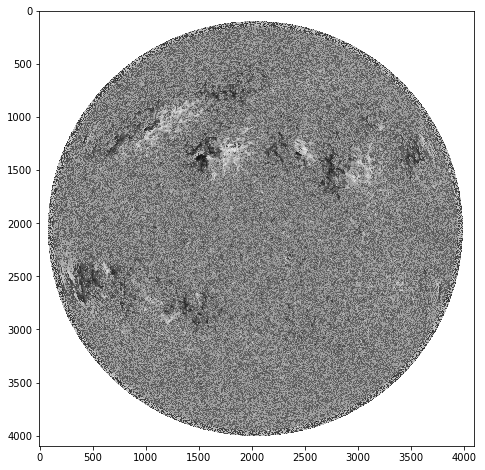

In [14]:
mymap = read_fits_to_map(filepath, plot_show=True)

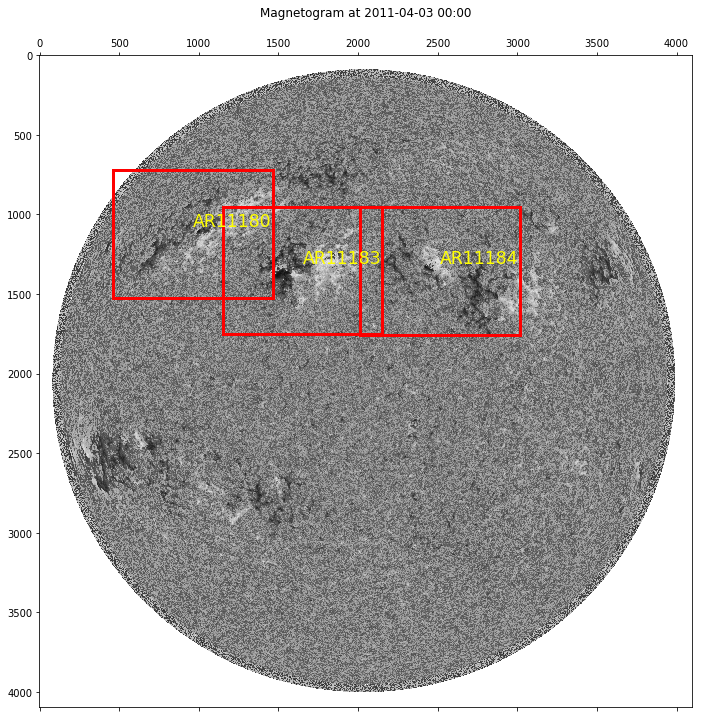

In [15]:
draw_regions(mymap, rc_list, delta=400)